지도 학습에는 __분류(Classification)__과 __회귀(Regression)__가 있다.
- 분류는 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것이다.
    - 분류에는 딱 두 개의 클래스로 분류하는 이진 분류와 셋 이상의 클래스로 분류하는 다중 분류로 나뉜다.

지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면, 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것이라 기대한다.
- 모델이 처음 보는 데이터에 대해서, 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(Generalization) 되었다고 한다.
훈련 세트와 테스트 세트가 매우 비슷하다면, 그 모델이 테스트 세트에서도 정확히 예측하리라 기대할 수 있습니다.
- 하지만, 매우 복잡한 모델을 만든다면 훈련 세트에서만 정확한 모델이 될 수 있습니다.

과대적합(Overfitting)
- 가진 정보를 모두 사용해서, 너무 복잡한 모델을 만든다.
- 과대적합ㅅ은 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화 되기 어려울 때 일어난다.
과소적합(Underfitting)
- 너무 간단한 모델이 선택된다.
- 데이터의 면면과 다양성을 잡아내지 못하고, 훈련 세트에도 잘 맞지 않는다.

모델을 복잡하게 할수록, 훈련 데이터에 대해서는 더 정확히 예측할 수 있다. 단, 너무 복잡해지면, 훈련 세트의 각 데이터 포인트에 너무 민감해져, 새로운 데이터에 잘 일반화되지 못한다.

In [14]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

forge 데이터셋은 2개의 특성을 가진다.
- x 축은 첫 번째 특성이다.
- y 축은 두 번째 특성이다.
- 산점도는 점 하나가 각 데이터 포인트를 나타낸다.
- 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타낸다.

X.shape:  (26, 2)


D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current

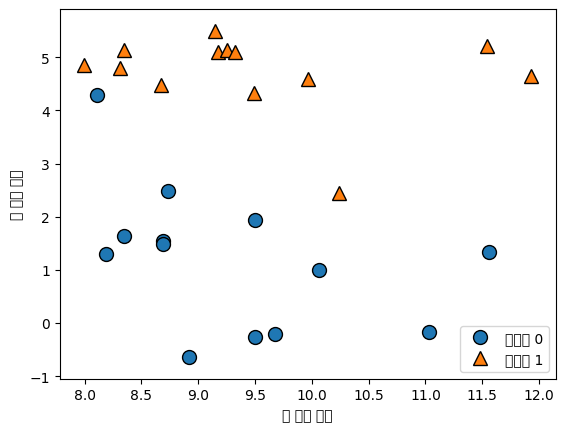

In [15]:
# 데이터셋을 만든다.
X, y = mglearn.datasets.make_forge()

# 산점도를 그린다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: ", X.shape)

X[:,0]과 X[:,1]은 파이썬의 인덱싱 방법을 사용하여, 2차원 배열(행렬) X에서, 데이터를 선택하는 방법을 나타낸다.
- X[:,0]는 X의 모든 행에서 첫 번째 열(인덱스 0)의 값을 선택한다.
    - 즉, 첫 번째 특성의 모든 값을 가져온다.
- X[:,1]는 X의 모든 행에서 두 번째 열(인덱스 1)의 값을 선택한다.
    - 즉, 두 번째 특성의 모든 값을 가져온다.
이렇게 선택된 값들은 각각 산점도의 x축과 y축의 값으로 사용된다.
    - 즉, X[:,0]은 x 축의 값들을, X[:,1]은 y축의 값들을 나타내게 된다.  

X.shape는 X의 형태를 나타내는 튜플을 반환한다.
이 튜플의 첫 번째 요소는 X의 행의 수(데이터 샘플의 수)이고, 두 번째 요소는 X의 열의 수(특성의 수)다.
- 예를 들어, X.shape가 (100,2)를 반환한다면, X가 100개의 데이터를 가지고 있으며, 2개의 특성을 가진 데이터셋임을 의미한다.
- shape 정보는 데이터셋의 크기와 복잡성을 이해하는데 도움이 된다.

튜플(tuple)은 여러 개의 요소를 담을 수 있는 컬렉션 타입 중 하나이다.
리스트와 유사하지만, 튜플은 한 번 생성되면 그 요소를 변경, 추가, 삭제할 수 없다.
이러한 특성 덕분에 튜플은 변경되지 않아야 하는 값들을 저장할 때 주로 사용한다.
튜플은 괄호()를 사용하여 생성하며, 각 요소는 쉼표(,)로 구분된다.
```
# 튜플 생성 예
Tuple = (1, 2, 3)
```
위 튜플은 세 개의 요소 1, 2, 3을 가지고 있다.

튜플의 요소에 접근할 떄는 인덱스를 사용한다.
인덱스는 0부터 시작하며, 대괄호를 사용하여 요소를 선택할 수 있다.
예를 들어, Tuple[0]은 튜플의 첫 번째 요소인 1을 반환한다.

Text(0, 0.5, '타깃')

D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44611 (\N{HANGUL SYLLABLE GIS}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\MachineLearning\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44611 (\N{HANGUL SYLLABLE GIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


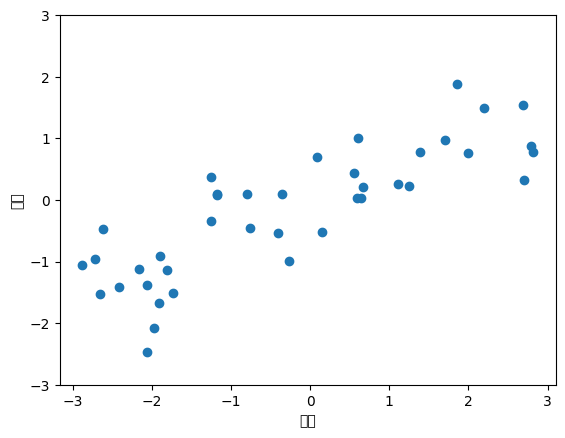

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용한다.
wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(응답)를 가진다.
특성을 x 축에 놓고, 회귀의 타깃(출력)을 y 축에 놓는다.

특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋(고차원 데이터셋)에서 그대로 유지되지 않을 수 있다.

인위적인 소규모 데이터셋 외에, scikit-learn에 들어 있는 실제 데이터셋도 두 개를 사용한다.
하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋이다.
- 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습한다.
- scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있다.

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


scikit-learn에 포함된 데이터셋은 실제 데이터와 데이터셋 관련 정보를 담고 있는 Bunch 객체에 저장되어 있다.
Bunch 객체는 파이썬 딕셔너리(Dictionary)와 비슷하지만, 점 표기법을 사용할 수 있다.
즉, bunch['key'] 대신, bunch.key를 사용할 수 있다.

Bunch는 파이썬에서 사용하는 객체 중 하나로, 속성을 가진 딕셔너리를 만들기 위해 사용한다.
이는 딕셔너리의 키를 객체의 속성처럼 접근할 수 있게 한다.

일반적인 딕셔너리 사용법
```
dict_obj = {'key': 'value'}
print(dict_obj['key'])  # 'value'
```  

bunch 객체 사용법
```
bunch_obj = Bunch(key='value')
print(bunch_obj.key)  # 'value'
```

이러한 방식은 코드를 더욱 읽기 쉽고, 관리하기 쉽게 만든다.
단, bunch 객체는 파이썬 표준 라이브러리에 포함되어 있지 않으므로, 별도로 설치하거나, 직접 구현해야 한다.

클래스를 사용하여, bunch객체 구현하기
```
class Bunch:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
```

Bunch 객체를 만들기 위해 클래스를 정의한다.
- 클래스의 이름을 Bunch로 지정하고, 생성자 메서드인 __init__을 정의한다.
    - 이 메서드는, **kwargs라는 특별한 매개변수를 받는다.

**kwargs 매개변수
- 키워드 인자(keyword arguments)를 의미한다.
- 이는 함수에 임의의 개수의 키워드 인자를 전달할 수 있게 해주는 파이썬의 문법이다.
- 예를 들어, Bunch(key="value", other_key="other value")와 같이 사용할 수 있다.

self.__dict__.update(kwargs)는 Bunch 객체의 속성 딕셔너리(__dict__)를 kwargs 딕셔너리로 업데이트한다.
- 이렇게 하면, kwargs의 각 키-값 쌍이 Bunch 객체의 속성이 된다.
- 이제 Bunch 클래스를 사용하여, bunch 객체를 만들 수 있다.
```
bunch_obj = Bunch(key='value', other_key='other value')
```
- 위 코드는 Bunch 클래스의 인스턴스를 생성하고, 이 인스턴스를 bunch_obj 변수에 할당한다.
- Bunch(key="value", other_key='other value') 부분은 Bunch 클래스의 생성자 메서드를 호출하며, key='value'와 other_key='other value'는 kwargs 딕셔너리를 형성합니다.

이제 위의 Bunch 클래스를 사용하여, 속성을 가진 객체를 만들 수 있다.
```
bunch_obj = Bunch(key="value", other_key = "other value")
print(bunch_obj.key)  # 'value'
print(bunch_obj.other_key)  # 'other value'
```

In [18]:
print("유방암 데이터의 형태: ", cancer.data.shape)

유방암 데이터의 형태:  (569, 30)


이 데이터셋은 569개의 데이터를 갖고 있으며, 30개의 특성을 갖고 있다.

In [19]:
print("클래스별 샘플 개수: \n", {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수: 
 {'malignant': 212, 'benign': 357}


np.bincount(cancer.target)
- numpy의 bincount 함수를 사용하여, cancer.target의 각 클래스에 속하는 샘플의 개수를 계산한다.
- cancer.target은 각 샘플의 클래스 레이블을 나타낸다.

{n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
- 이 코드는 python의 dictionary comprehension이라는 기능을 사용한다.
    - 이는 리스트 comprehension과 비슷한 개념으로, 간결하게 딕셔너리를 생성할 수 있게 해준다.  
- zip(cancer.target_names, np.bincount(cancer.tager))
    - zip 함수는 여러 개의 iterable한 객체(리스트, 튜플 등)를 인자로 받아, 동일한 인덱스를 가진 요소끼리 튜플로 묶어주는 역할을 한다.
    - 여기서는 cancer.target_names와 np.bincount(cancer.target) 두 개의 리스트를 받아, 각각의 클래스 이름과 그에 해당하는 샘플 개수를 묶어준다. 
- n : v for n, v in ...
    - 이 부분은 dictionary compression의 핵심이다. 
    - for n, v in ... 부분에서 zip 함수를 통해 묶인 튜플에서, 클래스 이름(n)과 샘플 개수(v)를 출력한다.
        - 그리고, n : v 부분에서 이를 딕셔너리의 키와 값으로 설정한다.

즉, 위 코드는 각 클래스 이름을 키로, 해당 클래스의 샘플의 개수를 값으로 가지는 딕셔너리를 생성한다.
이 딕셔너리는 클래스별 샘플 개수를 나타내게 된다.

python의 dictionary comprehension은 리스트 컴프리헨션과 비슷한 기능을 가지고 있다.
리스트 컴프리헨션은 리스트를 생성하는 방법 중 하나로, 리스트를 생성하는 코드를 한 줄로 간결하게 작성할 수 있다.

dictionary comprehension은 딕셔너리를 생성하는 방법 중 하나로, 딕셔너리를 생성하는 코드를 한 줄로 간결하게 작성할 수 있다.
for 루프와 if문을 사용하여 딕셔너리를 생성한다.
```
{key_expression: value_expression for (key, value) in iterable}
```
- key_expression은 딕셔너리의 키를 생성하는 표현식이다.
- value_expression은 딕셔너리의 값을 생성하는 표현식이다.
- iterable은 딕셔너리를 생성할 떄 사용할 iterable객체이다.

In [20]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


회귀 분석용 실제 데이터셋으로는 보스턴 주택가격 데이터셋을 사용한다.
이 데이터셋에는 데이터 포인트 506개와 특성 13개가 있다.

보스턴 데이터는 사이킷런에서 삭제되었으므로 스킵

모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴본다.
이를 위해, 실제 데이터인 유방암 데이터셋을 사용한다.

In [22]:
# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용한다.
neighbors_settings = range(1, 11)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current f

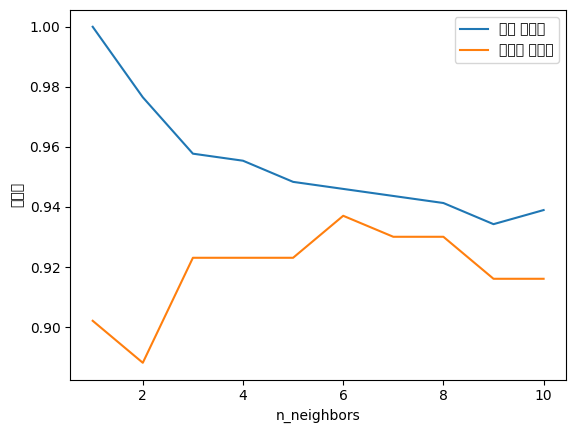

In [24]:
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽하다.
- 이웃의 수가 적을수록 모델이 복잡하기 때문
이웃의 수가 늘어나면, 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.
- 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다.
- 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해준다.
- 반대로, 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠진다.
- 정확도가 가장 좋을 떄는 중간 정도인 6개를 사용한 경우이다.

k-최근접 이웃 회귀
wave 데이터셋을 이용하여 이웃이 하나인 최근접 이웃을 사용한다.

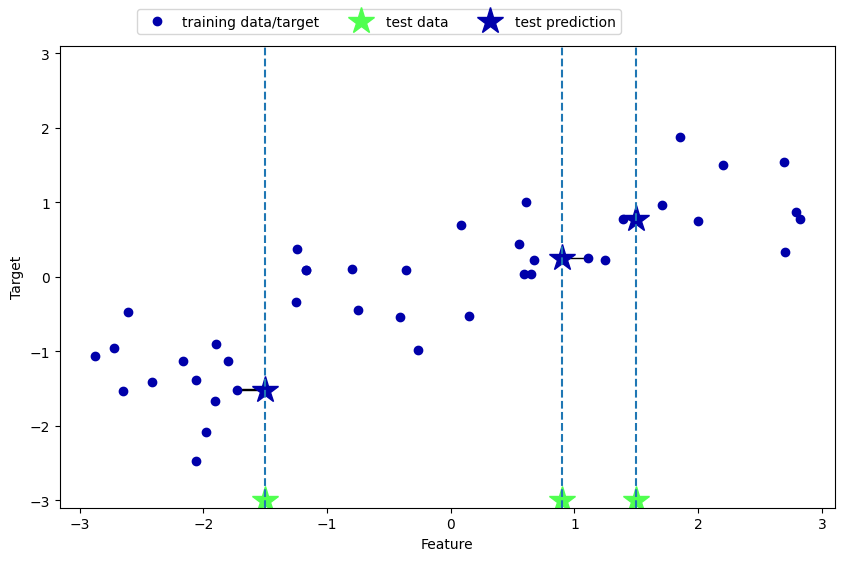

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

이웃을 둘 이상 사용하여, 회귀 분석을 할 수 있다.
여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측된다.

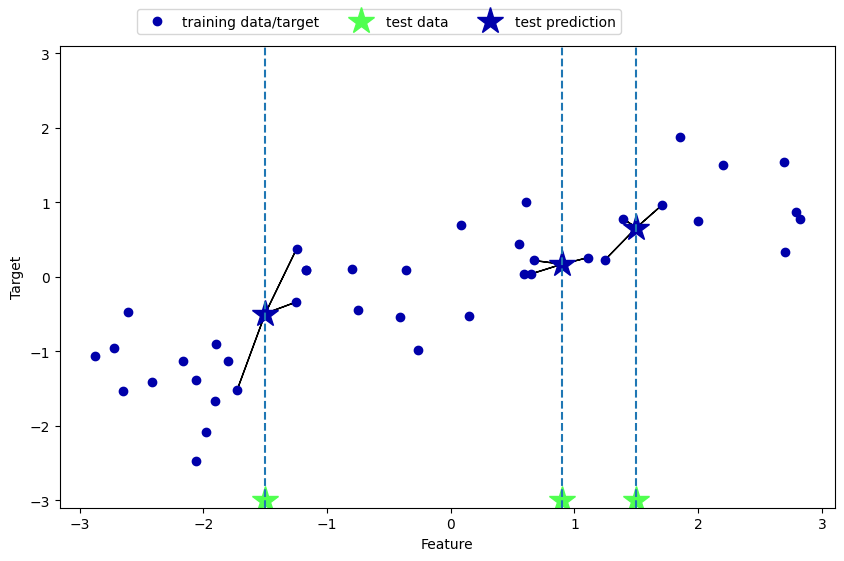

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어 있습니다.
사용법은 KNeighborsClassifier와 비슷하다.

In [30]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여, 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여, 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
print("테스트 세트 예측: \n", reg.predict(X_test))

테스트 세트 예측: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


테스트 세트에 대한 예측을 한다.
예측 또한 score 메서드를 사용해서 모델을 평가할 수 있다.
- score 메서드는 회귀일 땐, R^2 값을 반환한다.
    - R^2은 결정계수라고도 한다.
        - 회귀 모델이 예측한 값과, 실제 값 간의 상관관계를 나타내는 지표이다.
                - 1에 가까울수록, 모델이 데이터의 분산을 잘 설명하고 있음을 나타낸다.
        - 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0과 1 사이의 값이 된다.
        - 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우이다.
        - R^2은 음수가 될 수 있따.
            - 이때는, 예측과 타깃이 상반된 경향을 가지는 경우이다. 

In [32]:
print("테스트 세트의 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트의 R^2: 0.83


{:.2f}.format(reg.score(X_test, y_test))는 R^2 값을 소수점 둘째 자리까지 출력하는 코드입니다.
이 코드는 format() 메소드를 사용하여 문자열을 포맷팅하고 있다.
{:.2f}는 실수형 값을 소수점 둘째 자리까지 출력하라는 의미이며,
format() 메소드는 이 값을 출력할 문자열에 삽입한다.

KNeighborsRegressor 분석

1차원 데이터셋에 대해, 가능한 모든 특성 값을 만들어 예측해볼 수 있다.
이를 위해, x 축을 따라, 많은 포인트를 생성하여, 테스트 데이터셋을 만든다.

D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44611 (\N{HANGUL SYLLABLE GIS}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
D:\MachineLearning\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  f

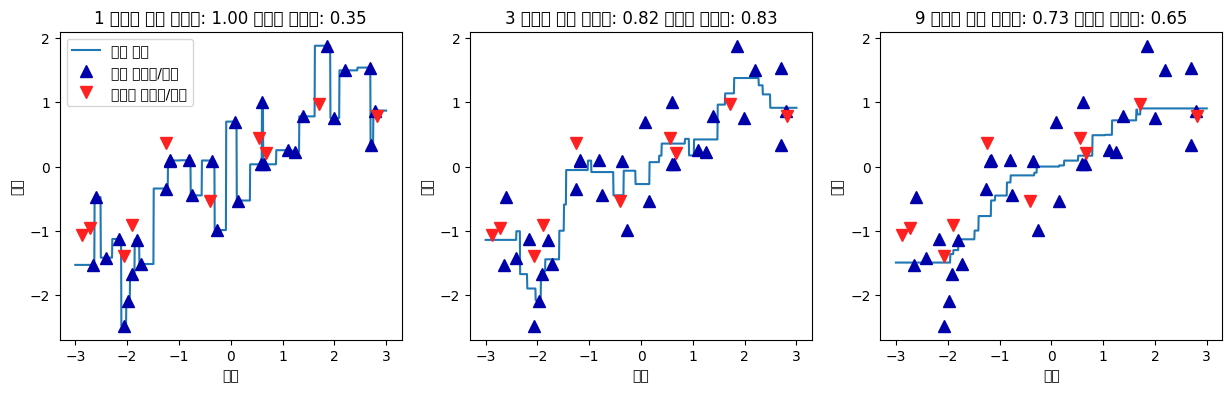

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3과 3 사이에 1,000 개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 한다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict((line)))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이웃을 하나만 사용할 때는, 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 너무 커서 예측값이 훈련 데이터를 모두 지나간다.
- 이는 매우 불안정한 예측을 만들어낸다.
- 이웃을 많이 사용하면, 훈련 데이터에는 잘 안 맞을 수 있지만, 더 안정된 예측을 얻게 된다.

KNeighbors 분류기에 중요한 매개변수는 2개이다.
- 데이터 포인트 사이의 거리를 재는 방법과, 이웃의 수이다.
- 거리를 재는 방법을 고르는 문제는 기본적으로, 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다.
    - KNeighborsClassifier와 KNeighborsRegressor의 객체를 생성할 때 metric 매개변수를 사용하여 거리 측정 방식을 변경할 수 있다.
        - metric 매개변수의 기본값은 민코프스키 거리를 의미하는 'minkowski'이며, 거듭제곱의 크기를 정하는 매개변수인 p가 기본값이 2일 때 유클리디안 거리와 같다.


K-NN 알고리즘은 모델을 매우 빠르게 만들 수 있지만, 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려진다.
- K-NN 알고리즘을 사용할 땐, 데이터를 전처리하는 과정이 매우 중요하다.
- 많은 특성을 가진(수백 개 이상) 데이터 셋에는 잘 동작하지 않는다.
- 특성 값 대부분이 0인(즉, 희소한) 데이터셋과는 잘 작동하지 않는다.   

__선형 모델(Linear model)__
- 입력 특성에 대한 선형 함수를 만들어서 예측을 수행한다.

1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시킨다.

w[0]: 0.393906  b: -0.031804


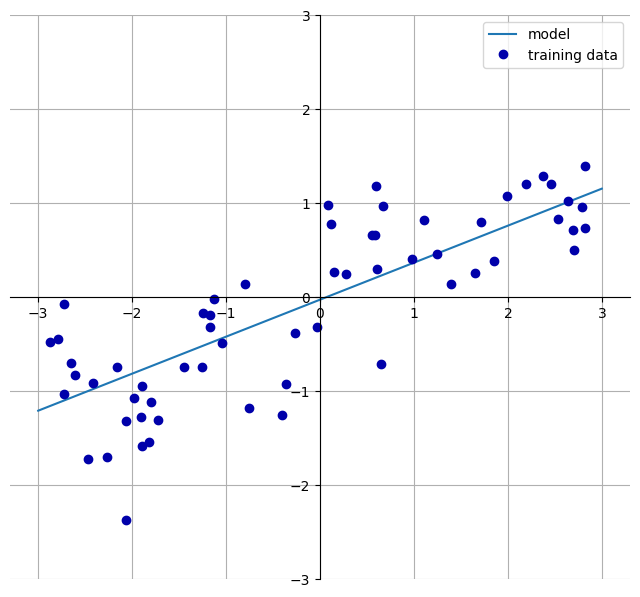

In [36]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 떈 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많음)에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 갖고 있다.

특성이 많은 데이터셋이라면, 선형 모델은 매우 훌륭한 성능을 낼 수 있다.
- 특히, 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게(훈련 세트에 대해서) 선형 함수로 모델링할 수 있다.

회귀를 위한 선형 모델은 다양하다.
- 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과, 모델의 복잡도를 제어하는 방법에서 차이가 난다.

선형 회귀(최소제곱법)
- 선형 회귀(linear regression) 또는 최소제곱법(OLS: ordinary least squares)은 가장 간단하고, 오래된 회귀용 선형 알고맂므이다.
- 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.
    - 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여, 더한 후 샘플의 개수로 나눈 것이다. 
- 선형 회귀는 매개변수가 없는 것이 장점이지만, 매개변수가 없기에 모델의 복잡도를 제어할 방법이 없다.

In [37]:
# 선형 모델을 만드는 코드이다.
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)